# Importando as bibliotecas necessárias

In [ ]:
from os import listdir
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import image_dataset_from_directory
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

# Realizando a leitura facial

In [ ]:
"""
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt.xml"
#cascPatheyes = os.path.dirname(
    #cv2.__file__) + "/data/haarcascade_eye_tree_eyeglasses.xml"

faceCascade = cv2.CascadeClassifier(cascPathface)
#eyeCascade = cv2.CascadeClassifier(cascPatheyes)

video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        faceROI = frame[y:y+h,x:x+w]
        gray_faceROI = cv2.cvtColor(faceROI, cv2.COLOR_BGR2GRAY)
        cv2.imwrite("new_image.png", gray_faceROI)
        #eyes = eyeCascade.detectMultiScale(faceROI)
        #for (x2, y2, w2, h2) in eyes:
            #eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            #radius = int(round((w2 + h2) * 0.25))
            #frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)

        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()
"""

'\ncascPathface = os.path.dirname(\n    cv2.__file__) + "/data/haarcascade_frontalface_alt.xml"\n#cascPatheyes = os.path.dirname(\n    #cv2.__file__) + "/data/haarcascade_eye_tree_eyeglasses.xml"\n\nfaceCascade = cv2.CascadeClassifier(cascPathface)\n#eyeCascade = cv2.CascadeClassifier(cascPatheyes)\n\nvideo_capture = cv2.VideoCapture(0)\nwhile True:\n    # Capture frame-by-frame\n    ret, frame = video_capture.read()\n    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)\n    faces = faceCascade.detectMultiScale(gray,\n                                         scaleFactor=1.1,\n                                         minNeighbors=5,\n                                         minSize=(60, 60),\n                                         flags=cv2.CASCADE_SCALE_IMAGE)\n    for (x,y,w,h) in faces:\n        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)\n        faceROI = frame[y:y+h,x:x+w]\n        gray_faceROI = cv2.cvtColor(faceROI, cv2.COLOR_BGR2GRAY)\n        cv2.imwrite("new_ima

# Fazendo o pré-processamento

Carregando o dataset

In [ ]:
!unzip "/content/drive/MyDrive/datasets/orl_database.zip"

Archive:  /content/drive/MyDrive/datasets/orl_database.zip
   creating: orl_database/
   creating: orl_database/persona_1/
  inflating: orl_database/persona_1/10_1.jpg  
  inflating: orl_database/persona_1/1_1.jpg  
  inflating: orl_database/persona_1/2_1.jpg  
  inflating: orl_database/persona_1/3_1.jpg  
  inflating: orl_database/persona_1/4_1.jpg  
  inflating: orl_database/persona_1/5_1.jpg  
  inflating: orl_database/persona_1/6_1.jpg  
  inflating: orl_database/persona_1/7_1.jpg  
  inflating: orl_database/persona_1/8_1.jpg  
  inflating: orl_database/persona_1/9_1.jpg  
   creating: orl_database/persona_10/
  inflating: orl_database/persona_10/100_10.jpg  
  inflating: orl_database/persona_10/91_10.jpg  
  inflating: orl_database/persona_10/92_10.jpg  
  inflating: orl_database/persona_10/93_10.jpg  
  inflating: orl_database/persona_10/94_10.jpg  
  inflating: orl_database/persona_10/95_10.jpg  
  inflating: orl_database/persona_10/96_10.jpg  
  inflating: orl_database/persona_

Identificando outliers

In [ ]:
#count = 0
for folder in listdir("orl_database"):
  for image in listdir(f"orl_database/{folder}"):
    img = Image.open(f"orl_database/{folder}/{image}")
    #count += 1
    print(np.array(img).shape)

#print(f'\n{count}')

(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70, 3)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(80, 70

Carregando as imagens

In [ ]:
images = []
labels = []
label = 0

for folder in listdir("orl_database"):
  for image in listdir(f"orl_database/{folder}"):
    img = Image.open(f"orl_database/{folder}/{image}")
    if np.array(img).shape == (80, 70, 3):
      img = img.convert("L")
    #array_img = np.array(img)
    #images.append(array_img)
    #print(array_img.shape)
    images.append(img)
    labels.append(label)
  label += 1

images = np.array(images)
labels = np.array(labels)

Normalizando os pixels

In [ ]:
for image in images:
  image = minmax_scale(image)
  #print(image)

# Treinando o modelo

Com KFold

In [ ]:
folds = KFold(n_splits=40, shuffle=True, random_state=42)
acc_scores = []
loss_scores = []

cnn = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(70, 80, 1)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(41, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

for train_index, test_index in folds.split(images):
  x_train, x_test = images[train_index], images[test_index]
  y_train, y_test = labels[train_index], labels[test_index]

  cnn.fit(x_train, y_train, epochs=25)

  test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)
  acc_scores.append(test_acc)
  loss_scores.append(test_loss)

print(f'Acurácia média: {np.mean(acc_scores)}')
print(f'Perda média: {np.mean(loss_scores)}')

Epoch 1/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.0336 - loss: 86.8439
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2146 - loss: 3.0629
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.8987 - loss: 0.4349
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9946 - loss: 0.0550
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 1.0000 - loss: 0.0082
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 1.0000 - loss: 8.1117e-04
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 1.0000 - loss: 6.3937e-04
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 1.0000 - loss: 2.5036e-04
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 1.0000 - loss: 1.7096e-04
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 1.0000 - loss: 1.0736e-04
Epoch 12/25
13/13 ━━━━━━━━━━━━━

Com Stratified KFold

In [ ]:
stfolds = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)
acc_scores = []
loss_scores = []

cnn = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(70, 80, 1)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(41, activation='softmax')
  ])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

for train_index, test_index in stfolds.split(images, labels):
  x_train, x_test = images[train_index], images[test_index]
  y_train, y_test = labels[train_index], labels[test_index]

  cnn.fit(x_train, y_train, epochs=27)

  test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=0)
  acc_scores.append(test_acc)
  loss_scores.append(test_loss)

print(f'Acurácia média: {np.mean(acc_scores)}')
print(f'Perda média: {np.mean(loss_scores)}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.0392 - loss: 99.2797 
Epoch 2/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.2131 - loss: 3.0920
Epoch 3/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.8767 - loss: 0.5897
Epoch 4/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9867 - loss: 0.0606
Epoch 5/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.9947 - loss: 0.0244
Epoch 6/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 7/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 1.0000 - loss: 4.0879e-04
Epoch 8/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 1.0000 - loss: 1.9575e-04
Epoch 9/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 1.0000 - loss: 8.7226e-05
Epoch 10/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 1.0000 - loss: 8.5978e-05
Epoch 11/27
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 1.0000 - loss: 6.2197e-05
Epoch 12/27
12/12 ━━━━━━━━━━━━

Medindo accurácia e perda durante o treino

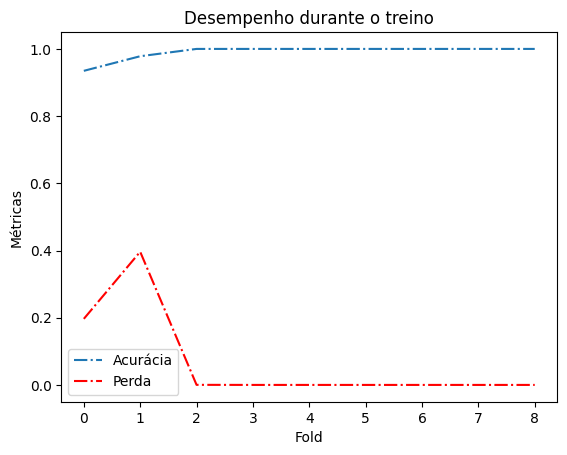

In [ ]:
plt.plot(acc_scores, '-.',label ='Acurácia')
plt.plot(loss_scores, '-.',label ='Perda', color='red')

plt.xlabel('Fold')
plt.ylabel('Métricas')
plt.legend()
plt.title('Desempenho durante o treino')
plt.show()

Salvando o modelo (Stratified Kfold)

In [ ]:
cnn.save("/content/drive/MyDrive/models/cnn_lamac.keras")

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 68, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,150,589 (27.28 MB)

 Trainable params: 2,383,529 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,767,060 (18.18 MB)

# Desafiando o modelo

Carregando o dataset

In [ ]:
!unzip "/content/drive/MyDrive/datasets/one_shot_learning.zip"

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: one_shot_learning/Face Dataset/263/0.jpg  
  inflating: one_shot_learning/Face Dataset/263/1.jpg  
  inflating: one_shot_learning/Face Dataset/263/2.jpg  
  inflating: one_shot_learning/Face Dataset/263/3.jpg  
  inflating: one_shot_learning/Face Dataset/263/4.jpg  
  inflating: one_shot_learning/Face Dataset/263/5.jpg  
  inflating: one_shot_learning/Face Dataset/263/6.jpg  
  inflating: one_shot_learning/Face Dataset/263/7.jpg  
  inflating: one_shot_learning/Face Dataset/263/8.jpg  
   creating: one_shot_learning/Face Dataset/264/
  inflating: one_shot_learning/Face Dataset/264/0.jpg  
  inflating: one_shot_learning/Face Dataset/264/1.jpg  
   creating: one_shot_learning/Face Dataset/265/
  inflating: one_shot_learning/Face Dataset/265/0.jpg  
  inflating: one_shot_learning/Face Dataset/265/1.jpg  
   creating: one_shot_learning/Face Dataset/266/
  inflating: one_shot_learning/Face Dataset/266/0.jpg  
  inflatin

Analisando as imagens

In [ ]:
for diretorio in listdir("/content/one_shot_learning/Extracted Faces"):
  for image in listdir(f"/content/one_shot_learning/Extracted Faces/{diretorio}"):
    img = Image.open(f"/content/one_shot_learning/Extracted Faces/{diretorio}/{image}")
    if np.array(img).shape != (128, 128, 3):
      print(np.array(img).shape)
      break

Carregando o modelo

In [ ]:
base_model = load_model("/content/drive/MyDrive/models/cnn_lamac.keras")

base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 68, 78, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 34, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,150,589 (27.28 MB)

 Trainable params: 2,383,529 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,767,060 (18.18 MB)

Teste 1: Reconhecimento com dataset Oneshot Learning

In [ ]:
new_images = []
new_labels = []

label = 0

for diretorio in listdir("/content/one_shot_learning/Extracted Faces"):
  for image in listdir(f"/content/one_shot_learning/Extracted Faces/"\
                       f"{diretorio}"):
    img = Image.open(f"/content/one_shot_learning/Extracted Faces/"\
                     f"{diretorio}/{image}")
    img = img.resize((80, 70)) # Resize to (width, height)
    # Ensure the image is grayscale. If it was a color image after resize, convert it.
    # If it was already grayscale, it will remain grayscale (mode 'L').
    img = img.convert("L")
    img = np.array(img)
    # Reshape to (height, width, channels) to match model's input shape (70, 80, 1)
    img = img.reshape(70, 80, 1) # Add channel dimension
    new_images.append(img)
    new_labels.append(label)
  label += 1

new_images = np.array(new_images) # Convert list of images to a single numpy array
new_labels = np.array(new_labels)

In [ ]:
aux = base_model.layers[-2].output
# The output Dense layer should have a number of neurons equal to the number of unique classes.
# len(set(new_labels)) gives the count of unique classes.
new_output = Dense(len(set(new_labels)), activation='softmax')(aux)
new_model = keras.Model(inputs=base_model.layers[0].input, outputs=new_output)

for layer in new_model.layers[:-1]:
    layer.trainable = False

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_images, new_labels,
                                                    test_size=0.2,
                                                    random_state = 42)

new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = new_model.fit(x_train, y_train, epochs=30)

test_loss, test_acc = new_model.evaluate(x_test, y_test, verbose=0)

print(f'Acurácia: {test_acc}')
print(f'Perda: {test_loss}')

Epoch 1/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8386 - loss: 3.7655
Epoch 2/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8533 - loss: 3.0440
Epoch 3/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8423 - loss: 2.5970
Epoch 4/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8405 - loss: 2.3416
Epoch 5/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8467 - loss: 2.2740
Epoch 6/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8372 - loss: 2.1263
Epoch 7/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8496 - loss: 1.8942
Epoch 8/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8444 - loss: 1.7126
Epoch 9/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8508 - loss: 1.4178
Epoch 10/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8459 - loss: 1.5009
Epoch 11/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8675 - loss: 1.2320
Epoch 12/30
153/153 ━━━━━━━━━━━━━━

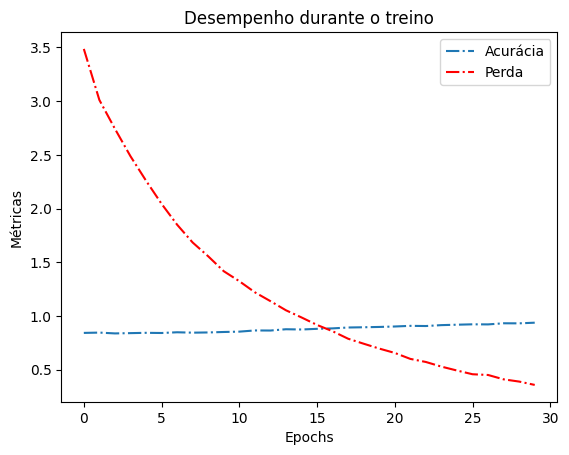

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

plt.plot(acc_values, '-.',label ='Acurácia')
plt.plot(loss_values, '-.',label ='Perda', color='red')

plt.xlabel('Epochs')
plt.ylabel('Métricas')
plt.legend()
plt.title('Desempenho durante o treino')
plt.show()

Teste 2: Reconhecimento com dataset VGG2